# The data

The dataset contains 2 folders - malaria infected and uninfected red blood cells- and a total of 27,558 images

Acknowledgements: This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

## 1. Importing and Reading the Data

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import files
import zipfile
import io

In [7]:
uploaded = files.upload()

Saving cell_images.zip to cell_images.zip


In [8]:
zip_file = zipfile.ZipFile(io.BytesIO(uploaded['cell_images.zip']), 'r')
zip_file.extractall('/content/dataset')
zip_file.close()

In [9]:
data_dir = '/content/dataset/cell_images'
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [10]:
os.listdir('/content/dataset/cell_images')

['test', 'train']

In [11]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [12]:
os.listdir(train_path)

['uninfected', 'parasitized']

We want to view a single image file

In [ ]:
os.listdir(train_path+'parasitized')[0]

'C184P145ThinF_IMG_20151203_104030_cell_42.png'

So in order to do that we create a file path to the first parasitized image :

In [13]:
para_cell = train_path + 'parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_cell

'/content/dataset/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

And then we use imread to turn that image into an array :

In [ ]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

And as we can see, it has 3 color channels therefore it is a color image :

In [ ]:
imread(para_cell).shape

(148, 142, 3)

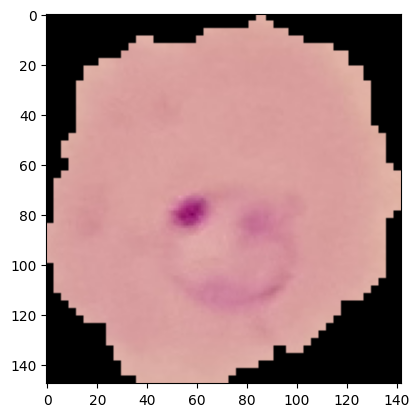

In [ ]:
plt.imshow(imread(para_cell))

We will now do the same for an uninficted image for comparison :

In [15]:
os.listdir(train_path + 'uninfected')[0]

'C205ThinF_IMG_20151106_151711_cell_172.png'

In [16]:
uninfected_cell = train_path + 'uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [ ]:
uninfected_cell

'/content/dataset/cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [ ]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

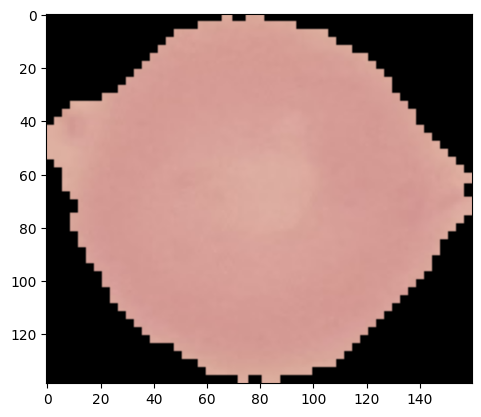

In [ ]:
plt.imshow(imread(uninfected_cell))

We now want to check how many images there are :

In [ ]:
len(os.listdir(train_path + 'parasitized'))

12480

In [ ]:
len(os.listdir(train_path + 'uninfected'))

12480

In [ ]:
len(os.listdir(test_path + 'parasitized'))

1300

In [ ]:
len(os.listdir(test_path + 'uninfected'))

1300

As we can see we have the same amount of each.

~

We now want to adress the issue of different sizes / dimentions between the images :

In [17]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    img_path = os.path.join(test_path, 'uninfected', image_filename)

    img = imread(img_path)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

Now we have split the x and y dimentions of all images into two lists : dim1 and dim2
And as we can at the graph bellow, they are not all the same but they do center around ~ 130

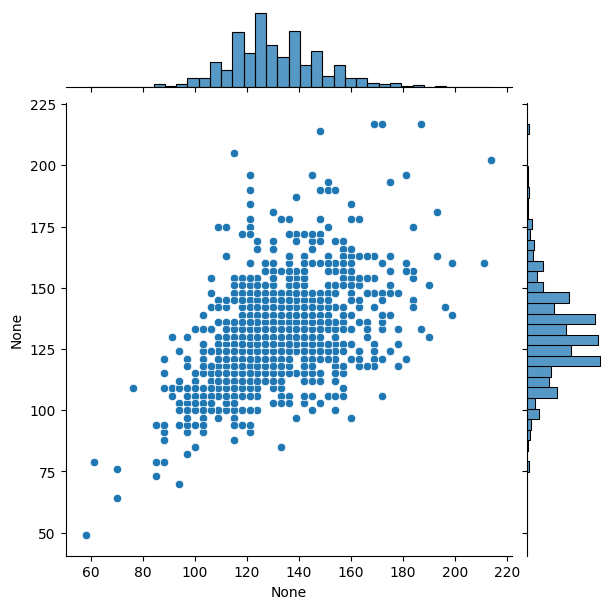

In [ ]:
sns.jointplot(x=dim1,y=dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

Therefore we can say that our final image shape is the average :

In [18]:
image_shape = (130,130,3)

## 2. Image Preprocessing

Our entire dataset is less than 30000 images collectively and for a complex problem like this it might not be enough.
So in order to expand the number of images (without having to collect more  data) we can use the already existing images and rotate them randomly, crop them , zoom in etc. in order to artificially expand our dataset

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               rescale=1./255  # Normalization
)

We can see an example here using the same image as previously.
This is the original image :

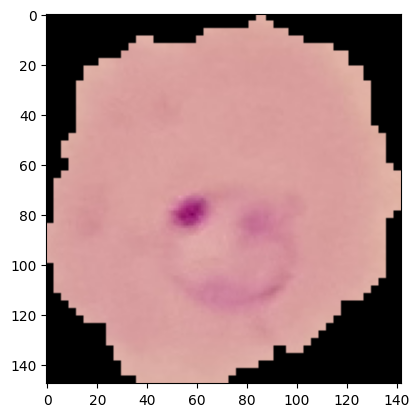

In [ ]:
para_img = imread(para_cell)
plt.imshow(para_img)

And we can now use the instance image_gen we created previously to randomly transform the image:

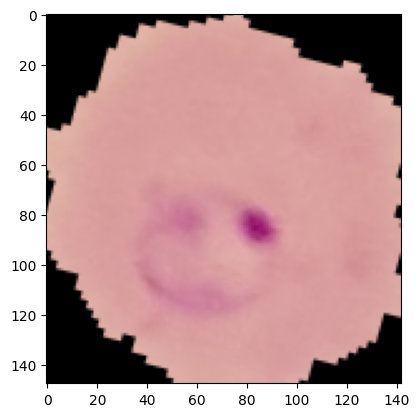

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In order to use it for our entire dataset we have to have sub-directories - classes - in our directory. In this case we already have them divided for us in parasitized and uninfected.

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## 3. Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
model = Sequential()

# Convolutional and Pooling layers with batch normalization
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Dense layers with regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Last layer -> binary classification using sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with a specified learning rate
learning_rate = 0.001
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 62, 62, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
batch_size = 16

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

We can now use the instance - generator - we created before to feed data into the model

In [ ]:
image_shape[:2]

(130, 130)

In [24]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 1060s 678ms/step - loss: 0.9630 - accuracy: 0.8079 - val_loss: 0.5206 - val_accuracy: 0.9223
Epoch 2/20
1560/1560 [==============================] - 1103s 707ms/step - loss: 0.5698 - accuracy: 0.9203 - val_loss: 0.5432 - val_accuracy: 0.9192
Epoch 3/20
1560/1560 [==============================] - 1055s 676ms/step - loss: 0.6122 - accuracy: 0.9240 - val_loss: 0.6681 - val_accuracy: 0.9354


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/malaria_model.keras')

## 4. Evaluating the model

Now we can check the loss and accuracy of the model as :

In [26]:
model.evaluate(test_image_gen)

163/163 [==============================] - 16s 82ms/step - loss: 0.6750 - accuracy: 0.9319


[0.6750361323356628, 0.9319230914115906]

In [ ]:
metrics = pd.DataFrame(results.history)

<Axes: >

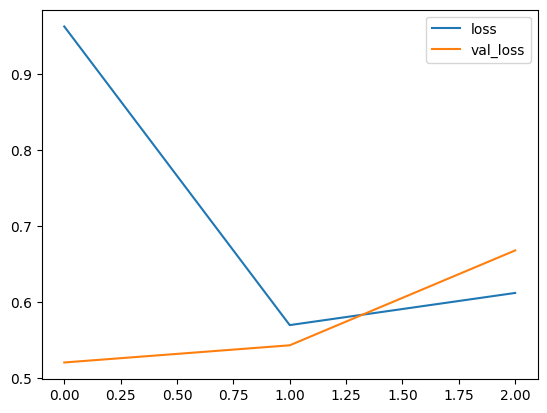

In [ ]:
metrics[['loss','val_loss']].plot()

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

We will now get the predictions in an array form:

In [29]:
predictions = (model.predict(test_image_gen) > 0.5).astype("int32")

163/163 [==============================] - 13s 79ms/step


In [30]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [40]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

Now we can print our classification report

In [41]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [43]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1173,  127],
       [  36, 1264]])

### As we can see from the confusion our model achieved a good result :
* True Negative (TN): 1173
* False Positive (FP): 127
* False Negative (FN): 36
* True Positive (TP): 1264

### That is also evident by the above classification report :
* *Accuracy:* 94%
* *Precision:* High precision for both classes, indicating that when the model predicts a class, it is likely correct.
* *Recall:* High recall for both classes, indicating that the model is capturing a high percentage of true positive cases.
* *F1-Score:* A balanced F1-score for both classes, considering both precision and recall.

#5. Predict on a single image

Let's use now an image to check if our model can predict correctly

In [49]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [50]:
#Load and preprocess the test image
my_image = image.load_img(para_cell, target_size=image_shape)
my_image_array = image.img_to_array(my_image)
my_image_array = preprocess_input(my_image_array)  # Apply normalization

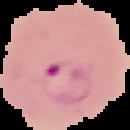

In [51]:
my_image

The above image is paracitized and therefore we expect the model to predict a value of zero ( 0 ) .

We will test that now.

In [52]:
type(my_image)

PIL.Image.Image

Since our model expects an array of 4 dimentions we need to change the type and shape to account for that :

In [53]:
my_image_array = image.img_to_array(my_image)
my_image_array = np.expand_dims(my_image_array, axis=0)  # Add a batch dimension

In [55]:
type(my_image_array)

numpy.ndarray

In [56]:
my_image_array.shape

(1, 130, 130, 3)

In [57]:
predict_malaria = (model.predict(my_image_array) > 0.5).astype("int32")
print(np.argmax(predict_malaria, axis=1))

1/1 [==============================] - 0s 381ms/step
[0]


# Success ! Our model predicted correctly that the patient is parasitised.

Just to be sure we can print the labels of the test and the train set to validate the correct prediction :

In [58]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [59]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}